# Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [3]:
#Importing Titanic dataset
df = pd.read_csv("titanic_train.csv")
df.isnull().sum()
print("Train Dataset Shape:",df.shape)

Train Dataset Shape: (891, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Analysis: 1.Here,we can see that there are null values in Age, Embarked and Cabin columns.
          2.Some columns are not numerical therefore we will be using scaling techniques.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

Univariate Analysis

In [7]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    d1 = pd.DataFrame([survived,dead])
    d1.index = ['Survived','Dead']
    d1.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


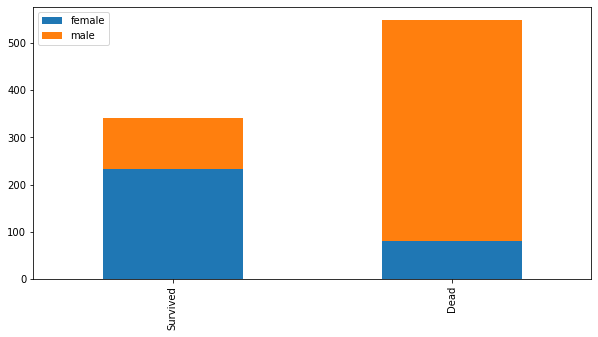

In [8]:
bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())

Analysis : This shows that women has greater survivablility rate than men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


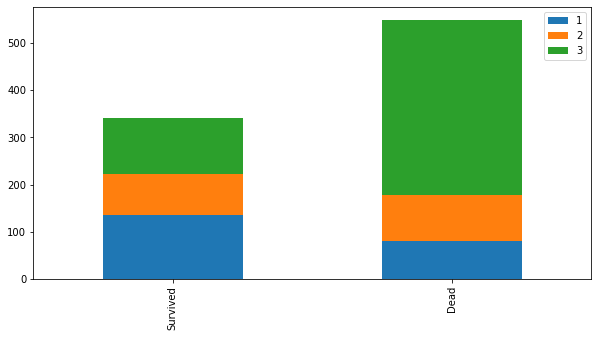

In [9]:
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

Analysis: This shows that Class1 has greatest and Class3 has the least survivablility.

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


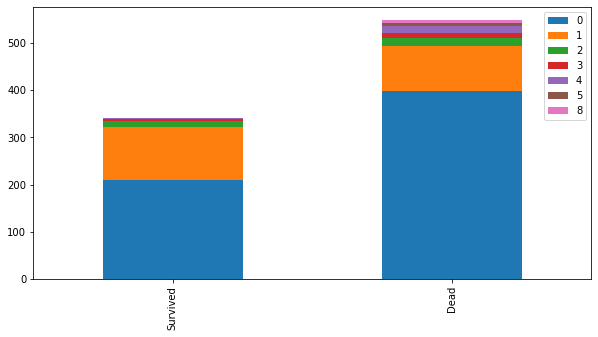

In [10]:
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

Analysis:  This shows that person with spouse and siblings has greater chance of survivablility than person with no  sibling or spouses.

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


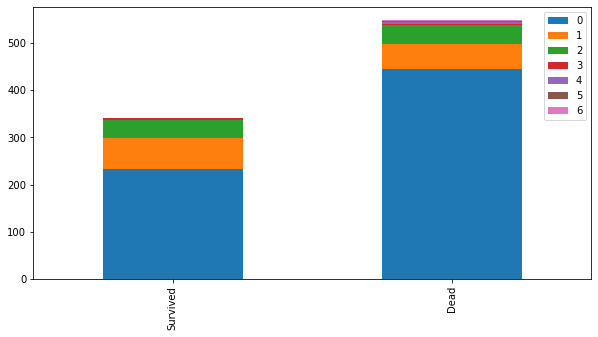

In [11]:
bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())

Analysis:  This shows that person with parents and children has greater chance of survivablility than person with no  parents or children.

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


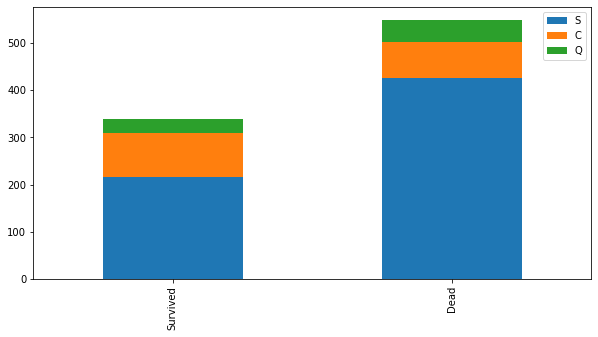

In [12]:
bar_chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Embarked'].value_counts())

Analysis:  This shows that person travelled from point S has greater chance of survivablility than person travelled from point C and Q.

# Preparing The Data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [14]:
# delete unnecessary feature from dataset
df.drop('Name', axis=1, inplace=True)

In [24]:
df.drop('Cabin', axis=1, inplace=True)

In [26]:
df.drop('Ticket', axis=1, inplace=True)

In [15]:
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [16]:
df["Age"].fillna(df["Age"].median(), inplace= True)

In [18]:
#Filling the misiing Embarked values by S
df['Embarked'] =  df['Embarked'].fillna('S')

In [20]:
#Mapping the the values so that it can be scaled in a better way
df.loc[ df['Age'] <= 16, 'Age'] = 0,
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1,
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2,
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3,
df.loc[(df['Age'] > 62), 'Age'] = 4

In [21]:
embarked_mapping = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [23]:
df.loc[df['Fare'] <= 17, 'Fare'] = 0,
df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1,
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2,
df.loc[df['Fare'] >= 100, 'Fare'] = 3

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Analysis: Now, we have cleansed our data as now there is no non-numerical and nan values present in the model.

# Preparing model for Training

In [29]:
x=df.drop("Survived",axis=1)
y=df["Survived"]


# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [31]:
from sklearn.linear_model import LogisticRegression
best_rstate=0
accu=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f"Best accuracy {accu*100} found on random state {best_rstate}")
    

Best accuracy 49.51366761697131 found on random state 150


In [32]:
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.25,random_state=150)

# Finding Best Models

SVC with kernels rbf and poly

In [33]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8475336322869955
[[127   7]
 [ 27  62]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       134
           1       0.90      0.70      0.78        89

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



In [34]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8340807174887892
[[126   8]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       134
           1       0.88      0.67      0.76        89

    accuracy                           0.83       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



Decision Tree Classifier

In [35]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7533632286995515
[[112  22]
 [ 33  56]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       134
           1       0.72      0.63      0.67        89

    accuracy                           0.75       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.75      0.75      0.75       223



In [36]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8565022421524664
[[124  10]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       134
           1       0.87      0.75      0.81        89

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.85       223



# Ensemble Methods

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=113)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8340807174887892
[[124  10]
 [ 27  62]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       134
           1       0.86      0.70      0.77        89

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [38]:
from sklearn.ensemble import AdaBoostClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=113)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8340807174887892
[[124  10]
 [ 27  62]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       134
           1       0.86      0.70      0.77        89

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



This implies we are getting best accuracy by using KNN Classification.

# HyperParameter Tuning

Improving our accuracy further.

In [48]:
parameters = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5]}

In [50]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV.pred=GCV.best_estimator_.predict(x_test)
print("Final accuracy :",accuracy_score(y_test,GCV.pred)*100)

Final accuracy : 84.75336322869956


Therefore, with Hyper parameter tuning we are getting a similar result.
Thatis why, we will opt for KNN classifier. 

# Serialization

In [51]:
import joblib
joblib.dump(knn,"titanicpro.pkl")

['titanicpro.pkl']